C:\Users\Кріс\AppData\Local\Temp\ipykernel_2380\1784440715.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


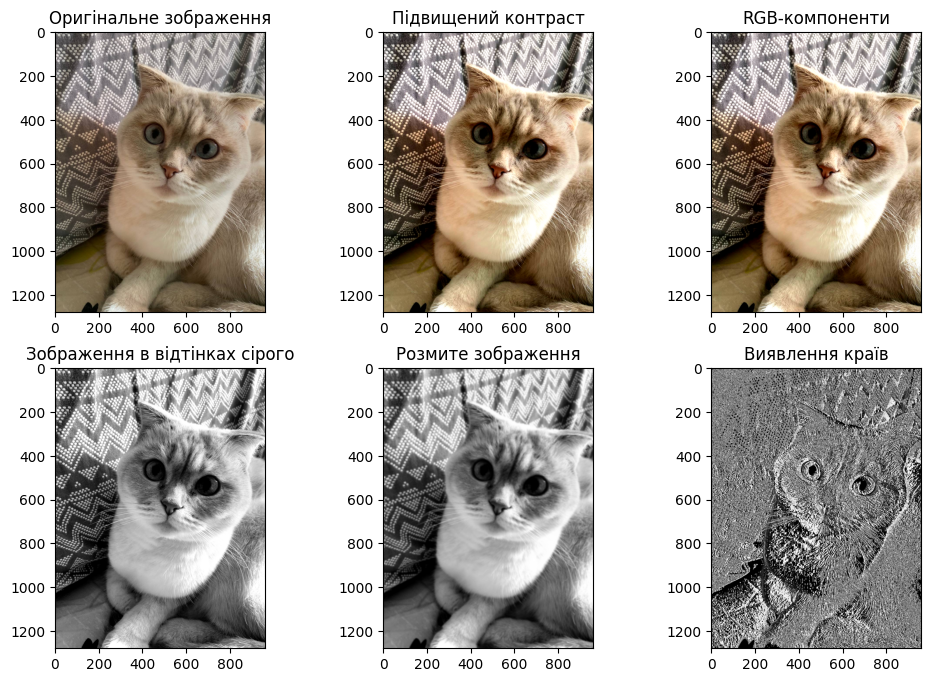

In [1]:
import imageio          
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Зчитуємо зображення з вказаного шляху до файлу
image_path = 'C:\photo_2023-10-12_16-44-39.jpg'
image = imageio.imread(image_path) 

# Підвищуємо контраст зображення, масштабуючи значення пікселів і обмежуючи їх між 0 та 255
enhanced_image = np.clip(1.5 * image - 50, 0, 255).astype(np.uint8)

# Розділяємо канали підсиленого зображення на складові червоного, зеленого та синього
r, g, b = enhanced_image[:, :, 0], enhanced_image[:, :, 1], enhanced_image[:, :, 2]

# Перетворюємо підсилене зображення в відтінки сірого за допомогою зваженої суми значень RGB
grayscale_image = np.dot(enhanced_image[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

# Застосовуємо фільтр Гаусса до зображення в відтінках сірого для розмиття
blurred_image = ndimage.gaussian_filter(grayscale_image, sigma=2)

# Використовуємо фільтр Собеля для виявлення країв на зображенні в відтінках сірого
edge_detected_image = ndimage.sobel(grayscale_image)

# Налаштовуємо сітку підзаголовків 2x3 для відображення різних етапів обробки зображення
plt.figure(figsize=(12, 8))

# Графік оригінального зображення
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Оригінальне зображення') 

# Графік зображення із підвищеним контрастом
plt.subplot(2, 3, 2)
plt.imshow(enhanced_image)
plt.title('Підвищений контраст')

# Графік складових RGB окремо
plt.subplot(2, 3, 3)
plt.imshow(np.stack([r, g, b], axis=-1))
plt.title('RGB-компоненти')

# Графік зображення в відтінках сірого
plt.subplot(2, 3, 4)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Зображення в відтінках сірого')

# Графік розмитого зображення
plt.subplot(2, 3, 5)
plt.imshow(blurred_image, cmap='gray')
plt.title('Розмите зображення')

# Графік зображення з виявленням країв
plt.subplot(2, 3, 6)
plt.imshow(edge_detected_image, cmap='gray')
plt.title('Виявлення країв')

# Відображення графіків
plt.show()


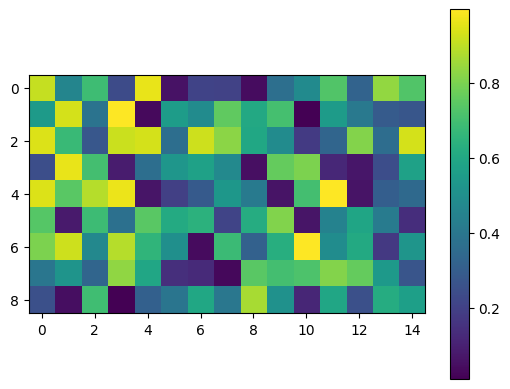

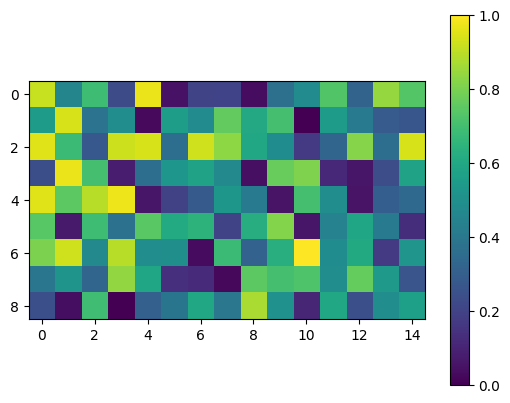

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 9 
M = 15

A = np.random.rand(N, M)

def find_nearest_value(z, A):
    closest_value = A.flat[np.abs(A - z).argmin()]
    return closest_value

mean_value = np.mean(A)
median_value = np.median(A)

plt.imshow(A, cmap='viridis')
plt.colorbar()
plt.show()

A[np.random.choice(N, size=5), np.random.choice(M, size=5)] = np.nan 

nan_indices = np.isnan(A)
A[nan_indices] = np.nanmean(A)

normalized_A = (A - np.nanmin(A)) / (np.nanmax(A) - np.nanmin(A))

plt.imshow(normalized_A, cmap='viridis')
plt.colorbar()
plt.show()